In [10]:
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
stock = pd.read_csv('TSLA.csv', parse_dates=True, index_col='Date')
stock

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...
2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500


In [12]:
#Create the function to get the Willaims %R values
def get_wr(high , low, close,lookback_period):
  high= high.rolling(lookback_period).max()
  low = low.rolling(lookback_period).min()
  wr = (high-close)/(high-low)*-100
  return wr

In [13]:
#Calculate the Williams %R with a lookback period and store it into a varaible
stock['wr_14'] = get_wr(stock['High'], stock['Low'], stock['Close'], 14)


In [14]:
#Generate buy and sell signals
buy_signals =stock[stock['wr_14'] <= -80]['Close']
sell_signals = stock[stock['wr_14'] >= -20]['Close']

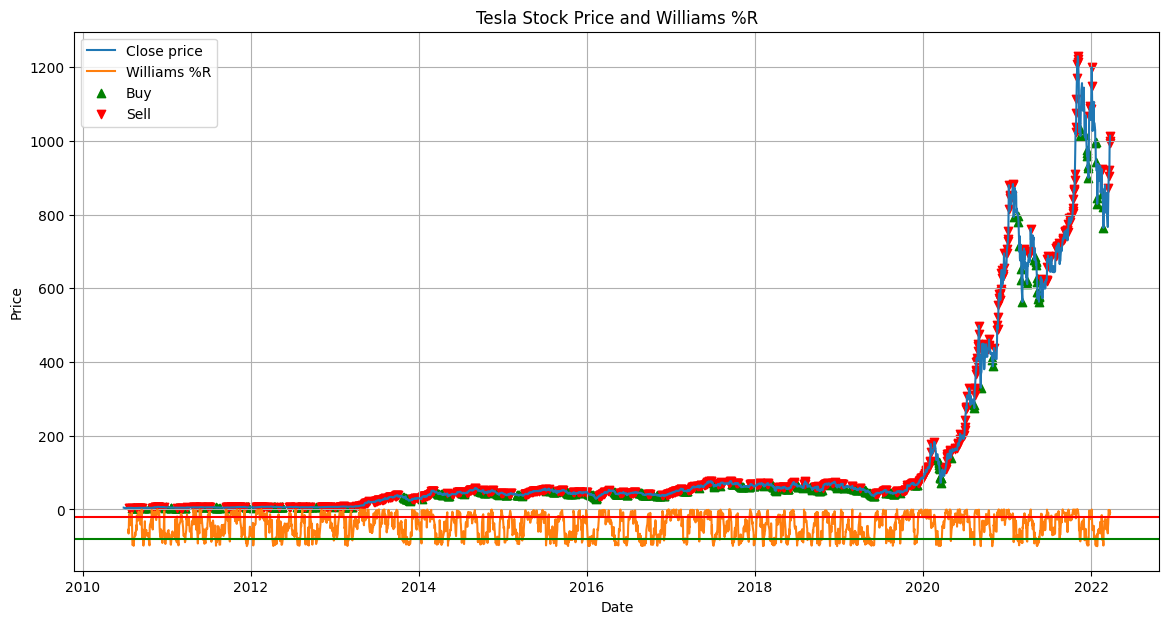

In [15]:
#Plot the data and the williams %R
plt.figure(figsize =(14,7))
plt.plot(stock['Close'], label='Close price')
plt.plot(stock['wr_14'], label='Williams %R')
plt.scatter(buy_signals.index, buy_signals, label='Buy', marker='^', color='green')
plt.scatter(sell_signals.index, sell_signals, label='Sell', marker='v', color='red')
plt.axhline(y=-80, color='g', linestyle='-')
plt.axhline(y=-20, color='r', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Tesla Stock Price and Williams %R')
plt.legend()
plt.grid(True)
plt.show()